In [1]:
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install -U scikit-learn
!pip3 install tensorflow
!pip3 install --upgrade tensorflow

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [3]:
# from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D, ZeroPadding2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

LOAD DATASET : KAGGLE

In [4]:
data_dir = 'C:/Users/aditi/OneDrive/Desktop/DESKTOP/VS_LANG/Python/LEGALITY_ML/DATASETS/archive/sign_data/sign_data'

img_width, img_height = 256, 256

datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=40,
                             width_shift_range=0.4,
                             height_shift_range=0.4,
                             shear_range=0.4,
                             zoom_range=0.4,
                             horizontal_flip=True,
                             vertical_flip=True,
                             validation_split=0.2)

train_data = datagen.flow_from_directory(data_dir,
                                         target_size=(img_width, img_height),
                                         batch_size=64,
                                         class_mode='binary',
                                         subset='training')

validation_data = datagen.flow_from_directory(data_dir,
                                            target_size=(img_width, img_height),
                                            batch_size=64,
                                            class_mode='binary',
                                            subset='validation')

Found 1720 images belonging to 2 classes.
Found 429 images belonging to 2 classes.


CNN ARCHITECTURE

In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(1024, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

C:\Users\aditi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


CNN MODEL COMPILATION

In [7]:
model.compile(loss='binary_crossentropy',
            #   optimizer='sgd',
              optimizer='adam',
            #   optimizer='rmsprop',
              metrics=['accuracy', 'precision', 'recall'])

CNN MODEL TRAINING

In [8]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, mode='min', min_lr=0.001)


history = model.fit(train_data,
                    epochs=100,
                    validation_data=validation_data,
                    callbacks=[es, rlr],
                    )

Epoch 1/100


C:\Users\aditi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


27/27 ━━━━━━━━━━━━━━━━━━━━ 119s 4s/step - accuracy: 0.6575 - loss: 0.6675 - precision: 0.7644 - recall: 0.7936 - val_accuracy: 0.7669 - val_loss: 0.5871 - val_precision: 0.7669 - val_recall: 1.0000 - learning_rate: 0.0100
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 87s 3s/step - accuracy: 0.7678 - loss: 0.5766 - precision: 0.7778 - recall: 0.9822 - val_accuracy: 0.7669 - val_loss: 0.5458 - val_precision: 0.7669 - val_recall: 1.0000 - learning_rate: 0.0100
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - accuracy: 0.7635 - loss: 0.5654 - precision: 0.7644 - recall: 0.9981 - val_accuracy: 0.7669 - val_loss: 0.5420 - val_precision: 0.7669 - val_recall: 1.0000 - learning_rate: 0.0100
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 85s 3s/step - accuracy: 0.7733 - loss: 0.5548 - precision: 0.7748 - recall: 0.9975 - val_accuracy: 0.7669 - val_loss: 0.5457 - val_precision: 0.7669 - val_recall: 1.0000 - learning_rate: 0.0100
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 86s 3s/step - accuracy: 0.7734 - loss: 0

CNN MODEL EVALUATION

In [9]:
y_pred = model.predict(validation_data)
y_pred = (y_pred > 0.5)

7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step


In [10]:
scores = model.evaluate(validation_data, verbose=1)
f1 = f1_score(validation_data.classes, y_pred)
print('Accuracy:', scores[1])
print('Precision:', scores[2])
print('Recall:', scores[3])  
print('F1 Score:', f1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.7685 - loss: 0.5425 - precision: 0.7685 - recall: 1.0000
Accuracy: 0.7668997645378113
Precision: 0.7668997645378113
Recall: 1.0
F1 Score: 0.8680738786279684


CLASSIFICATION REPORT & CONFUSION MATRIX - CNN

In [11]:
cm = confusion_matrix(validation_data.classes, y_pred)
cr = classification_report(validation_data.classes, y_pred)

C:\Users\aditi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aditi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aditi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

In [12]:
print('CLASSIFICATION REPORT: \n',cr)
print('CONFUSION MATRIX: \n', cm)

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       0.77      1.00      0.87       329

    accuracy                           0.77       429
   macro avg       0.38      0.50      0.43       429
weighted avg       0.59      0.77      0.67       429

CONFUSION MATRIX: 
 [[  0 100]
 [  0 329]]


TRAINING HISTORY PLOT

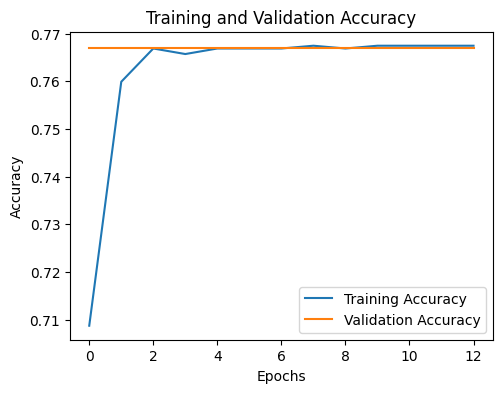

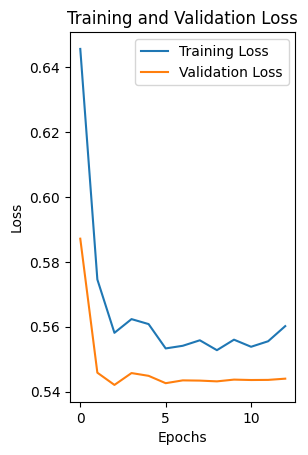

In [13]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()